<a href="https://colab.research.google.com/github/SwamySriharsha/Regression/blob/master/Linear_Regression_Comparision_with_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dtrain = {'X':[1,2,3,4,5], 'Y':[3,4,2,4,5]}
df = pd.DataFrame(data=dtrain)
df

,X,Y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


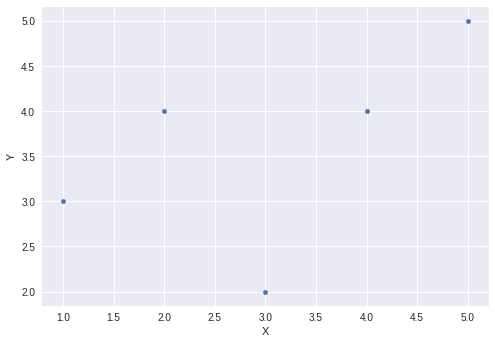

In [6]:
df.plot(kind="scatter", x="X", y="Y")


# **Linear Regression using GRADIENT DESCENT**

In [75]:
def compute_error(m,c):
  '''It computes sum of squared error'''
  sse = 0
  for i,r in df.iterrows():
    sse += (r['Y'] - (m*r['X'] + c))**2
  return sse 


def find_newGrad(m, c, learning_rate):
  '''
  new m = (old m) - (learning_rate * [doe(f)/doe(m)] at old m)
  new c = (old c) - (learning_rate * [doe(f)/doe(c)] at old c)
  
  '''
  diffm = 0
  diffc = 0
  for i in range(len(df)):
    diffm += -2*df['X'][i]*(df['Y'][i]-(m*df['X'][i] + c)) #[doe(f)/doe(m)] at old m
    diffc += -2*(df['Y'][i]-(m*df['X'][i] + c)) #[doe(f)/doe(c)] at old c
  newm = m - learning_rate*diffm #update equation for m
  newc = c - learning_rate*diffc #update equation for c
  cvM = abs(newm-m)
  cvC = abs(newc-c)
  return newm,newc,cvM,cvC 


def gradient_descent(m_initial, c_initial, learning_rate):
  m = m_initial
  c = c_initial
  cvM = 1
  cvC = 1
  converge_limit = 0.0
  
  i=0
  while(cvM > converge_limit and cvC > converge_limit):
    m,c,cvM,cvC = find_newGrad(m, c, learning_rate)
    i=i+1
    
  sse = compute_error(m,c)
  return m,c,sse,i


def run():
  
  #set parameters
  learning_rate = 0.01 #try for different learning rates
  m_initial = 0 #assuming initial m value as 0
  c_initial = 0 #assuming initial c value as 0
  
  sse_initial = compute_error(m_initial,c_initial) #computing SSE with initial m and c values
  print("m is {0}, c is {1}, sse is {2}".format(m_initial,c_initial,sse_initial))
  
  m,c,sse,i = gradient_descent(m_initial, c_initial, learning_rate)
  print("m is {0}, c is {1}, sse is {2}, iters are {3}".format(m,c,sse,i))

if __name__ == "__main__":
  run()

m is 0, c is 0, sse is 70
m is 0.40000000000000613, c is 2.399999999999978, sse is 3.599999999999999, iters are 1893


# **Normal Linear Regression**

In [0]:
class LinearRegression:
    
    def __init__(self):
        self.m = 0
        self.c = 0
        #print("Object has been created")
        
    def fit(self,df):
        '''m = sum((x-meanX)(y-meanY))/sum((x-meanX)^2)'''
        '''c = meanY-(m*meanX)'''
        meanX = np.mean(df['X'])
        meanY = np.mean(df['Y'])
        num = np.sum( (df['X']-meanX) * (df['Y']-meanY) )
        den = np.sum( (df['X']-meanX) ** 2 )
        self.m = num/den
        self.c = meanY-(self.m*meanX)
        #print("Done")
        print("m is {0}, c is {1}".format(self.m,self.c), end=", ")
        sse = compute_error(self.m,self.c)
        print("sse is {0}".format(sse))
    
    def predict(self,xdf):
        ypred = [(self.m*val)+self.c for val in xdf['X']]
        xdf.plot(kind="scatter", x='X', y='Y', color='r')
        plt.plot(xdf['X'], ypred, marker='o', color='b')
        return pd.DataFrame(data=ypred)

In [90]:
#Build Model
model = LinearRegression()
model.fit(df)

m is 0.4, c is 2.4, sse is 3.5999999999999996
